In [25]:
from pymatgen.ext.matproj import MPRester
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer

# https://pymatgen.org/introduction.html
# You have to use the old Materials Project website: https://legacy.materialsproject.org/dashboard
with MPRester("XNPeIZJFSHBQ0Rgi") as m:

    # Structure for material id
    structure = m.get_structure_by_material_id("mp-984761")
    
    # We take the conventional structure instead of primitive
    structure = SpacegroupAnalyzer(structure).get_conventional_standard_structure()

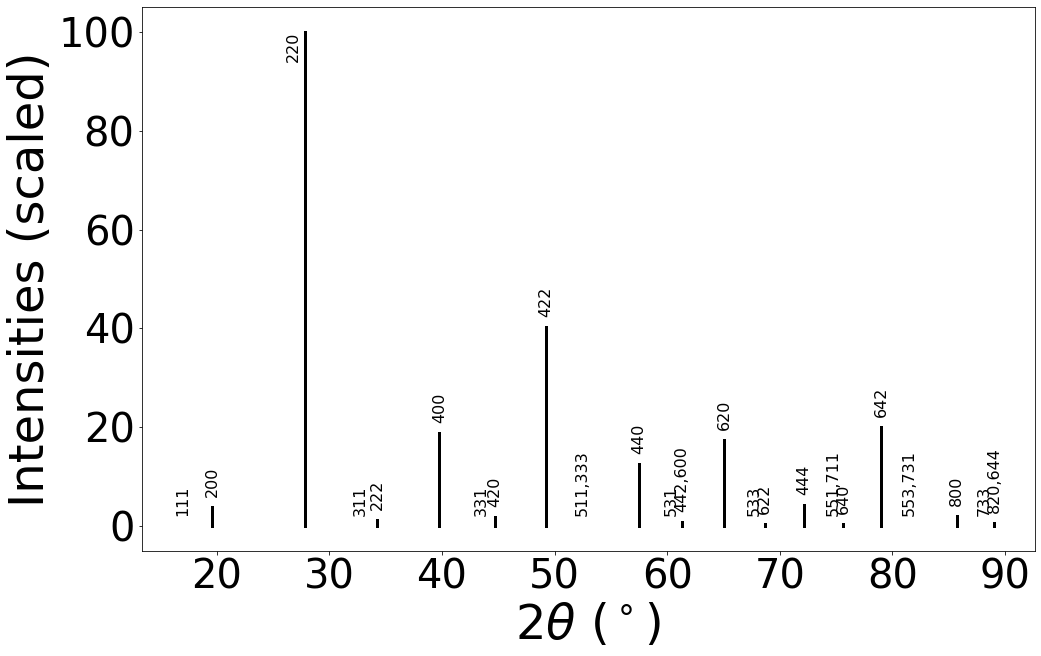

Pic de diffraction  1  : 2*théta =  16.934065694807426 degrés
                       Intensité (sur une échelle de 100% par rapport au pic le plus élevé) :  0.09106882525301879
                       Indices hkl : (1, 1, 1) de multiplicité 8


Pic de diffraction  2  : 2*théta =  19.577786867934257 degrés
                       Intensité (sur une échelle de 100% par rapport au pic le plus élevé) :  3.8877768077720183
                       Indices hkl : (2, 0, 0) de multiplicité 6


Pic de diffraction  3  : 2*théta =  27.825309755861554 degrés
                       Intensité (sur une échelle de 100% par rapport au pic le plus élevé) :  100.0
                       Indices hkl : (2, 2, 0) de multiplicité 12




In [26]:
from pymatgen.analysis.diffraction.xrd import XRDCalculator

# Rayon X incident CuKa avec lambda=1.54060 angströms
xrd = XRDCalculator(1.54060)

# On affiche la structure
xrd.show_plot(structure)

# On s'intéresse au trois premiers pics du diffractogramme
# Regarder https://pymatgen.org/pymatgen.analysis.diffraction.xrd.html
xrdpattern = xrd.get_pattern(structure = structure, scaled = True, two_theta_range = (0,90))

for i in range(0,3) :
    
    print("Pic de diffraction ", i+1 , " : 2*théta = ", xrdpattern.x[i], 'degrés')
    print("                       Intensité (sur une échelle de 100% par rapport au pic le plus élevé) : ", xrdpattern.y[i]) 
    
    for dic in xrdpattern.hkls[i]:
        print("                       Indices hkl :", dic['hkl'], "de multiplicité",dic['multiplicity'])
    print('\n')

Ces résultats peuvent être vérifiés ici: https://materialsproject.org/materials/mp-984761?material_ids=mp-984761#diffraction_patterns. De plus dans le cas d'un réseau cubique face centrée (comme c'est le cas ici), on s'attend à obtenir d'abord le pic [1,1,1] puis [2,0,0] et enfin [2,2,0]. (voir chapitre 3 slide 37) 